Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
videos = pd.read_csv("df1.csv")

In [3]:
videos.describe()

,Unnamed: 0,category_id,views,likes,dislikes,comment_count
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,21972.742000,17.247000,8.636547e+06,2.644025e+05,1.582910e+04,2.869586e+04
std,11909.230983,7.732385,9.691270e+06,3.750684e+05,5.856614e+04,6.367129e+04
min,14.000000,1.000000,3.409696e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,11782.500000,10.000000,4.116269e+06,6.945800e+04,3.324500e+03,5.576000e+03
50%,22349.000000,22.000000,5.336080e+06,1.680180e+05,6.446000e+03,1.394100e+04
75%,32700.250000,24.000000,9.099658e+06,3.179028e+05,1.309775e+04,3.147450e+04
max,40858.000000,30.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


In [12]:
videos.head(3)

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description
0,5901,FlsCjmMhFmw,2017-12-13,youtube rewind shape youtuberewind,youtube spotlight,24,2017-12-06 17:58:51,rewind rewind youtube rewind youtuberewind rew...,137843120,3014479,1602383,817582,youtube rewind celebrating videos people musi...
1,34362,VYOjWnS4cMY,2018-05-13,childish gambino america official video,childishgambinovevo,10,2018-05-06 04:00:07,childish gambino rap america mcdj recording rc...,98938809,3037318,161813,319502,america childish gambino
2,4700,6ZfuNTqbHE8,2017-12-07,marvel studios avengers infinity war official ...,marvel entertainment,24,2017-11-29 13:26:24,marvel comics comic books nerdy geeky super he...,89930713,2606665,53011,347982,idea avengers infinity war theaters may sub...


In [13]:
#1 Content based recommender using similar tags

In [14]:
videos['tags'].head()

0    rewind rewind youtube rewind youtuberewind rew...
1    childish gambino rap america mcdj recording rc...
2    marvel comics comic books nerdy geeky super he...
3    bighit bts bangtan fake love fake love fake love 
4    bad bunny amorfoda dura daddy yankee ozuna rom...
Name: tags, dtype: object

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words
tfidf = TfidfVectorizer(stop_words='english')

In [17]:
#Replace NaN with an empty string
videos['tags'] = videos['tags'].fillna('')

In [18]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(videos['tags'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(1000, 6427)

In [19]:
#We can see that there are 6427 different words in the dataset of tags of 1000 YouTube videos

In [20]:
#Array mapping from feature integer indices to feature name.
tfidf.get_feature_names()[2000:2010]

['fight',
 'fighter',
 'fighters',
 'fights',
 'filal',
 'filet',
 'filipino',
 'film',
 'films',
 'filmselect']

In [21]:
#select features
features = ['title','channel_title','tags']

In [22]:
# Define function to combine values of columns selected as features
def combine_fs(row):
    return row['title']+" "+row['channel_title']+" "+row['tags']

In [23]:
#Combine selected features in one column
videos["combined_fs"] = videos.apply(combine_fs,axis=1)

In [24]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [25]:
cosine_sim.shape

(1000, 1000)

In [26]:
indices = pd.Series(videos.index, index=videos['title']).drop_duplicates()

In [27]:
indices[:10]

title
youtube rewind  shape  youtuberewind                              0
childish gambino   america official video                         1
marvel studios avengers infinity war official trailer             2
bts fake love official mv                                         3
nicky jam x j balvin x equis video oficial prod afro bros jeon    4
luis fonsi demi lovato chame la culpa                             5
venom official trailer hd                                         6
  daughter                                                        7
maroon girls like  ft cardi b                                     8
drake god s plan                                                  9
dtype: int64

In [31]:
# Function that takes in video title as input and outputs most similar video suggestions
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the videos based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar videos
    sim_scores = sim_scores[1:6]

    # Get the video indices
    video_indices = [i[0] for i in sim_scores]

    # Return the top 5 most similar videos
    print("5 Recommended videos to *"+title+"* are:\n")
    print("Ttitle|Channel Title\n")
    for mii in video_indices:
        print(videos['title'].iloc[mii] + " | "+ videos['channel_title'].iloc[mii])

In [30]:
get_recommendations('drake god s plan')

5 Recommended movies to *drake god s plan* are:

Ttitle|Channel Title

drake god s plan official music video  | ovo sound
drake lil baby yes indeed pikachu wshh exclusive official audio  | worldstarhiphop
drake  m upset | ovo sound
pusha t  story  adidon drake diss wshh exclusive official audio  | worldstarhiphop
lil wayne family feud feat drake official audio dedication  | lil wayne


In [25]:
#Recommender system 2 using channel title and tags

In [26]:
def create_soup(x):
    return ''.join(x['tags']) + '' + ''.join(x['channel_title'])

In [27]:
# Create a new soup feature
videos['soup'] = videos.apply(create_soup, axis=1)

In [28]:
videos[['soup']].head(5)

,soup
0,rewind rewind youtube rewind youtuberewind rew...
1,childish gambino rap america mcdj recording rc...
2,marvel comics comic books nerdy geeky super he...
3,bighit bts bangtan fake love fake love fake lo...
4,bad bunny amorfoda dura daddy yankee ozuna rom...


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(videos['soup'])

In [30]:
count_matrix.shape

(1000, 6607)

In [31]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [32]:
# Reset index of your main DataFrame and construct reverse mapping as before
videos = videos.reset_index()
indices = pd.Series(videos.index, index=videos['title'])

In [33]:
get_recommendations('drake god s plan', cosine_sim2)

5 Recommended movies to *drake god s plan* are:

Ttitle|Channel Title

drake god s plan official music video  | ovo sound
drake  m upset | ovo sound
drake lil baby yes indeed pikachu wshh exclusive official audio  | worldstarhiphop
lil wayne family feud feat drake official audio dedication  | lil wayne
pusha t  story  adidon drake diss wshh exclusive official audio  | worldstarhiphop


In [ ]:
#3 Recommender system using word2vec model from Google

In [59]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gunzip GoogleNews-vectors-negative300.bin.gz

--2021-03-29 06:56:18--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.100.13
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.100.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  97.6MB/s    in 19s     

2021-03-29 06:56:37 (84.0 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]

gzip: GoogleNews-vectors-negative300.bin already exists; do you wish to overwrite (y or n)? ^C


In [34]:
pip install python-Levenshtein

     |████████████████████████████████| 50 kB 3.0 MB/s eta 0:00:011
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=171564 sha256=71e4ef444d9f94827c81186db53b14eeddc3e7a1cbdbb4dbc1c223010c0c36bc
  Stored in directory: /home/jovyan/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!python -m pip install -U gensim
import gensim

wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

Requirement already up-to-date: gensim in /opt/conda/lib/python3.7/site-packages (4.0.0)


In [32]:
matrix_youtube_vocab = []
for list_ in videos.to_numpy():
    list_[2] = [word for word in list_[2] if word in wv.vocab]
    list_[3] = [word for word in list_[3] if word in wv.vocab]
    list_[4] = [word for word in list_[4] if word in wv.vocab]
    matrix_youtube_vocab.append(list_)
df_netflix_vocab = pd.DataFrame(matrix_youtube_vocab, columns=videos.columns)

NameError: name 'wv' is not defined

In [ ]:
from tqdm import tqdm

def recommendation(title):
    matrix_youtube_title_vocab = []
    for list_ in videos[videos['title'] == title].to_numpy():
        list_[2] = [word for word in list_[2] if word in wv.vocab]
        list_[3] = [word for word in list_[3] if word in wv.vocab]
        list_[4] = [word for word in list_[4] if word in wv.vocab]
        matrix_youtube_title_vocab.append(list_)

    matrix_similarity = []
    pbar = tqdm(matrix_youtube_vocab)
    for list1 in pbar:
        for list2 in matrix_youtube_title_vocab:
            score_catg = wv.n_similarity(list1[2], list2[2])
            score_desc = wv.n_similarity(list1[3], list2[3])
            try:
                score_title = wv.n_similarity(list1[4], list2[4])/2
            except:
                score_title = 0
            if ((list1[1] != list2[1]) & (score_catg > 0.85)):
                matrix_similarity.append([list1[1], list2[1], score_title, score_chntitle, score_tags])
        pbar.update()
    pbar.close()
    df_youtube_similarity = pd.DataFrame(matrix_similarity, columns = ['recommendation','title','score_chntitle', 'score_tags'])
    df_youtube_similarity['final_score'] = videos_similarity['score_title'] + videos_similarity['score_chntitle'] + videos_similarity['score_tags']
    return (df_youtube_similarity.sort_values(by=['final_score', 'score_tags', 'score_chntitle'], ascending=False).head(10))

In [ ]:
recommendation('drake god s plan')

In [ ]:
#sentiment analysis of titles

In [11]:
!python -m pip install -U textblob

Requirement already up-to-date: textblob in /opt/conda/lib/python3.7/site-packages (0.15.3)


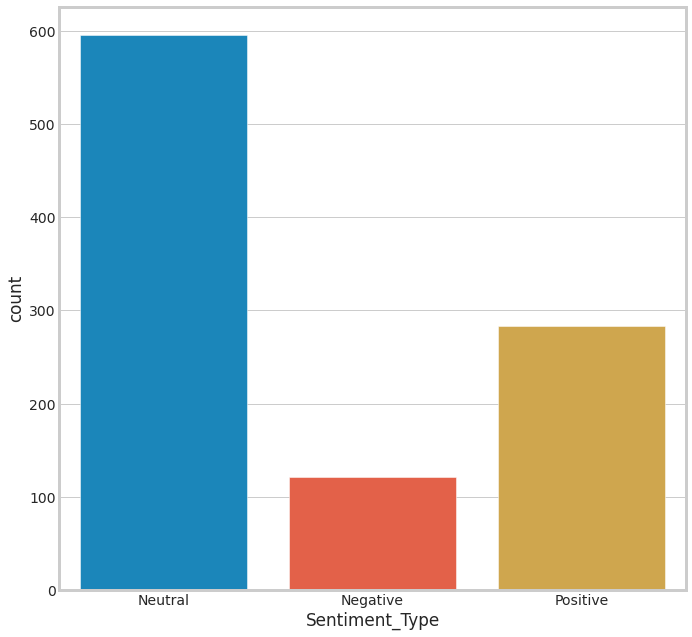

In [10]:
from textblob import TextBlob

bloblist_title = list()

videos_title_str=videos['title']
for row in videos_title_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    videos_polarity_title = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(videos_polarity_title):
    if videos_polarity_title['sentiment'] > 0:
        val = "Positive"
    elif videos_polarity_title['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

videos_polarity_title['Sentiment_Type'] = videos_polarity_title.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=videos_polarity_title)

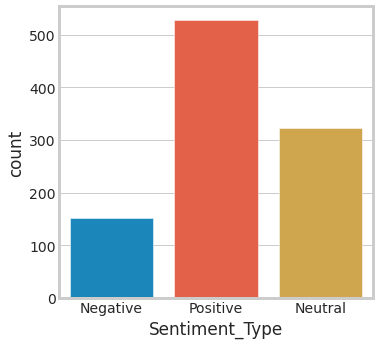

In [34]:
bloblist_title = list()

videos_title_str2=videos['tags']
for row in videos_title_str2:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    videos_polarity_title2 = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(videos_polarity_title2):
    if videos_polarity_title2['sentiment'] > 0:
        val = "Positive"
    elif videos_polarity_title2['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

videos_polarity_title2['Sentiment_Type'] = videos_polarity_title2.apply(f_title, axis=1)

plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=videos_polarity_title2)